<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Lab: Cleaning Rock Song Data

---


<h1>Lab Guide<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#1.-Load-rock.csv-and-do-an-initial-examination-of-its-data-columns." data-toc-modified-id="1.-Load-rock.csv-and-do-an-initial-examination-of-its-data-columns.-1">1. Load <code>rock.csv</code> and do an initial examination of its data columns.</a></span></li><li><span><a href="#2.--Clean-up-the-column-names." data-toc-modified-id="2.--Clean-up-the-column-names.-2">2.  Clean up the column names.</a></span></li><li><span><a href="#3.-How-many-missing-values-are-there?" data-toc-modified-id="3.-How-many-missing-values-are-there?-3">3. How many missing values are there?</a></span></li><li><span><a href="#4.-Why-is-the-release-column-coded-as-object-type?-Convert-to-a-more-appropriate-format." data-toc-modified-id="4.-Why-is-the-release-column-coded-as-object-type?-Convert-to-a-more-appropriate-format.-4">4. Why is the release column coded as object type? Convert to a more appropriate format.</a></span></li><li><span><a href="#5.-Obtain-summary-statistics-for-the-converted-release-column." data-toc-modified-id="5.-Obtain-summary-statistics-for-the-converted-release-column.-5">5. Obtain summary statistics for the converted release column.</a></span></li><li><span><a href="#6.-What-is-the-role-of-the-year-column?-How-does-it-relate-to-the-release-year?" data-toc-modified-id="6.-What-is-the-role-of-the-year-column?-How-does-it-relate-to-the-release-year?-6">6. What is the role of the year column? How does it relate to the release year?</a></span></li><li><span><a href="#7.-Plot-the-distributions-of-the-release-year,-playcount-and-fg." data-toc-modified-id="7.-Plot-the-distributions-of-the-release-year,-playcount-and-fg.-7">7. Plot the distributions of the release year, playcount and fg.</a></span></li><li><span><a href="#8.-Plot-the-playcount-versus-the-release-year." data-toc-modified-id="8.-Plot-the-playcount-versus-the-release-year.-8">8. Plot the playcount versus the release year.</a></span></li><li><span><a href="#9.-Which-years-have-the-most-releases?" data-toc-modified-id="9.-Which-years-have-the-most-releases?-9">9. Which years have the most releases?</a></span></li><li><span><a href="#10.-Which-records-don't-have-matching-&quot;Play-Count&quot;-corresponding-to-&quot;F*G&quot;?" data-toc-modified-id="10.-Which-records-don't-have-matching-&quot;Play-Count&quot;-corresponding-to-&quot;F*G&quot;?-10">10. Which records don't have matching "Play Count" corresponding to "F*G"?</a></span></li><li><span><a href="#11.-Which-artists-have-the-most-songs?" data-toc-modified-id="11.-Which-artists-have-the-most-songs?-11">11. Which artists have the most songs?</a></span></li><li><span><a href="#Bonus:-Which-artists-have-the-most-playcounts?" data-toc-modified-id="Bonus:-Which-artists-have-the-most-playcounts?-12">Bonus: Which artists have the most playcounts?</a></span></li><li><span><a href="#Bonus:-Which-artists-have-the-most-missing-values-between-each-of-the-variables?" data-toc-modified-id="Bonus:-Which-artists-have-the-most-missing-values-between-each-of-the-variables?-13">Bonus: Which artists have the most missing values between each of the variables?</a></span></li></ul></div>

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.5)

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

### 1. Load `rock.csv` and do an initial examination of its data columns.

In [68]:
# Load the data.
df = pd.read_csv("../../../../resource-datasets/rock_songs/rock.csv")
df.head()

,Song Clean,ARTIST CLEAN,Release Year,COMBINED,First?,Year?,PlayCount,F*G
0,Caught Up in You,.38 Special,1982,Caught Up in You by .38 Special,1,1,82,82
1,Fantasy Girl,.38 Special,NaN,Fantasy Girl by .38 Special,1,0,3,0
2,Hold On Loosely,.38 Special,1981,Hold On Loosely by .38 Special,1,1,85,85
3,Rockin' Into the Night,.38 Special,1980,Rockin' Into the Night by .38 Special,1,1,18,18
4,Art For Arts Sake,10cc,1975,Art For Arts Sake by 10cc,1,1,1,1


In [69]:
# Look at the information regarding its columns.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2230 entries, 0 to 2229
Data columns (total 8 columns):
Song Clean      2230 non-null object
ARTIST CLEAN    2230 non-null object
Release Year    1653 non-null object
COMBINED        2230 non-null object
First?          2230 non-null int64
Year?           2230 non-null int64
PlayCount       2230 non-null int64
F*G             2230 non-null int64
dtypes: int64(4), object(4)
memory usage: 139.5+ KB


### 2.  Clean up the column names.

Clean up the column names. Choose one of the methods from the lesson.

In [70]:
import string
# the string library has default strings that contain all letters or numbers
uppercase = string.ascii_uppercase
lowercase = string.ascii_lowercase

In [71]:
new_columns = []
for word in df.columns:
    new_word = ''
    for letter in word:
        if letter in uppercase or letter in lowercase:
            new_word += letter.lower()
    new_columns.append(new_word)
new_columns    

df.columns = new_columns

df.columns

Index(['songclean', 'artistclean', 'releaseyear', 'combined', 'first', 'year',
       'playcount', 'fg'],
      dtype='object')

### 3. How many missing values are there?

Filter the rows containing missing release years using the command `.isnull()` on the release column.

In [77]:
df.isnull().sum()

songclean        0
artistclean      0
releaseyear    577
combined         0
first            0
year             0
playcount        0
fg               0
dtype: int64

In [76]:
df[df['releaseyear'].isnull()].head()

,songclean,artistclean,releaseyear,combined,first,year,playcount,fg
1,Fantasy Girl,.38 Special,NaN,Fantasy Girl by .38 Special,1,0,3,0
10,"Baby, Please Don't Go",AC/DC,NaN,"Baby, Please Don't Go by AC/DC",1,0,1,0
13,CAN'T STOP ROCK'N'ROLL,AC/DC,NaN,CAN'T STOP ROCK'N'ROLL by AC/DC,1,0,5,0
16,Girls Got Rhythm,AC/DC,NaN,Girls Got Rhythm by AC/DC,1,0,24,0
24,Let's Get It Up,AC/DC,NaN,Let's Get It Up by AC/DC,1,0,4,0


### 4. Why is the release column coded as object type? Convert to a more appropriate format.

In [79]:
df.releaseyear.unique()

array(['1982', nan, '1981', '1980', '1975', '2000', '2002', '1992',
       '1985', '1993', '1976', '1995', '1979', '1984', '1977', '1990',
       '1986', '1974', '2014', '1987', '1973', '2001', '1989', '1997',
       '1971', '1972', '1994', '1970', '1966', '1965', '1983', '1955',
       '1978', '1969', '1999', '1968', '1988', '1962', '2007', '1967',
       '1958', '1071', '1996', '1991', '2005', '2011', '2004', '2012',
       '2003', '1998', '2008', '1964', '2013', '2006', 'SONGFACTS.COM',
       '1963', '1961'], dtype=object)

In [52]:
df['releaseyear'] = df['releaseyear'].apply(lambda x: int(x) if type(x) is str and x.isdigit()
                        else(None if type(x) is str
                             else x))
df['releaseyear'].head()

0    1982.0
1       NaN
2    1981.0
3    1980.0
4    1975.0
Name: releaseyear, dtype: float64

### 5. Obtain summary statistics for the converted release column.

What do you notice? What would you suggest to do?

In [53]:
for i in df['releaseyear']:
    print(type(i))

<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class '

<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class '

### 6. What is the role of the year column? How does it relate to the release year?

In [80]:
# Year = 1 if a year is contained (str or not), Year = 0 if a NaN is contained
# in the solutions we check how we've cleaned the data, and that the binary indeed = year, and not SONGFACTS entry

### 7. Plot the distributions of the release year, playcount and fg.

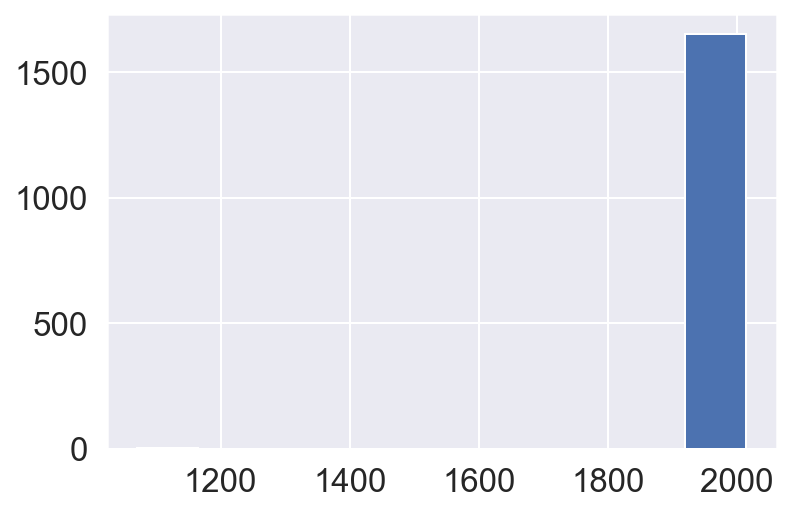

In [64]:
df.releaseyear.hist();

/Users/Noah/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/Noah/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


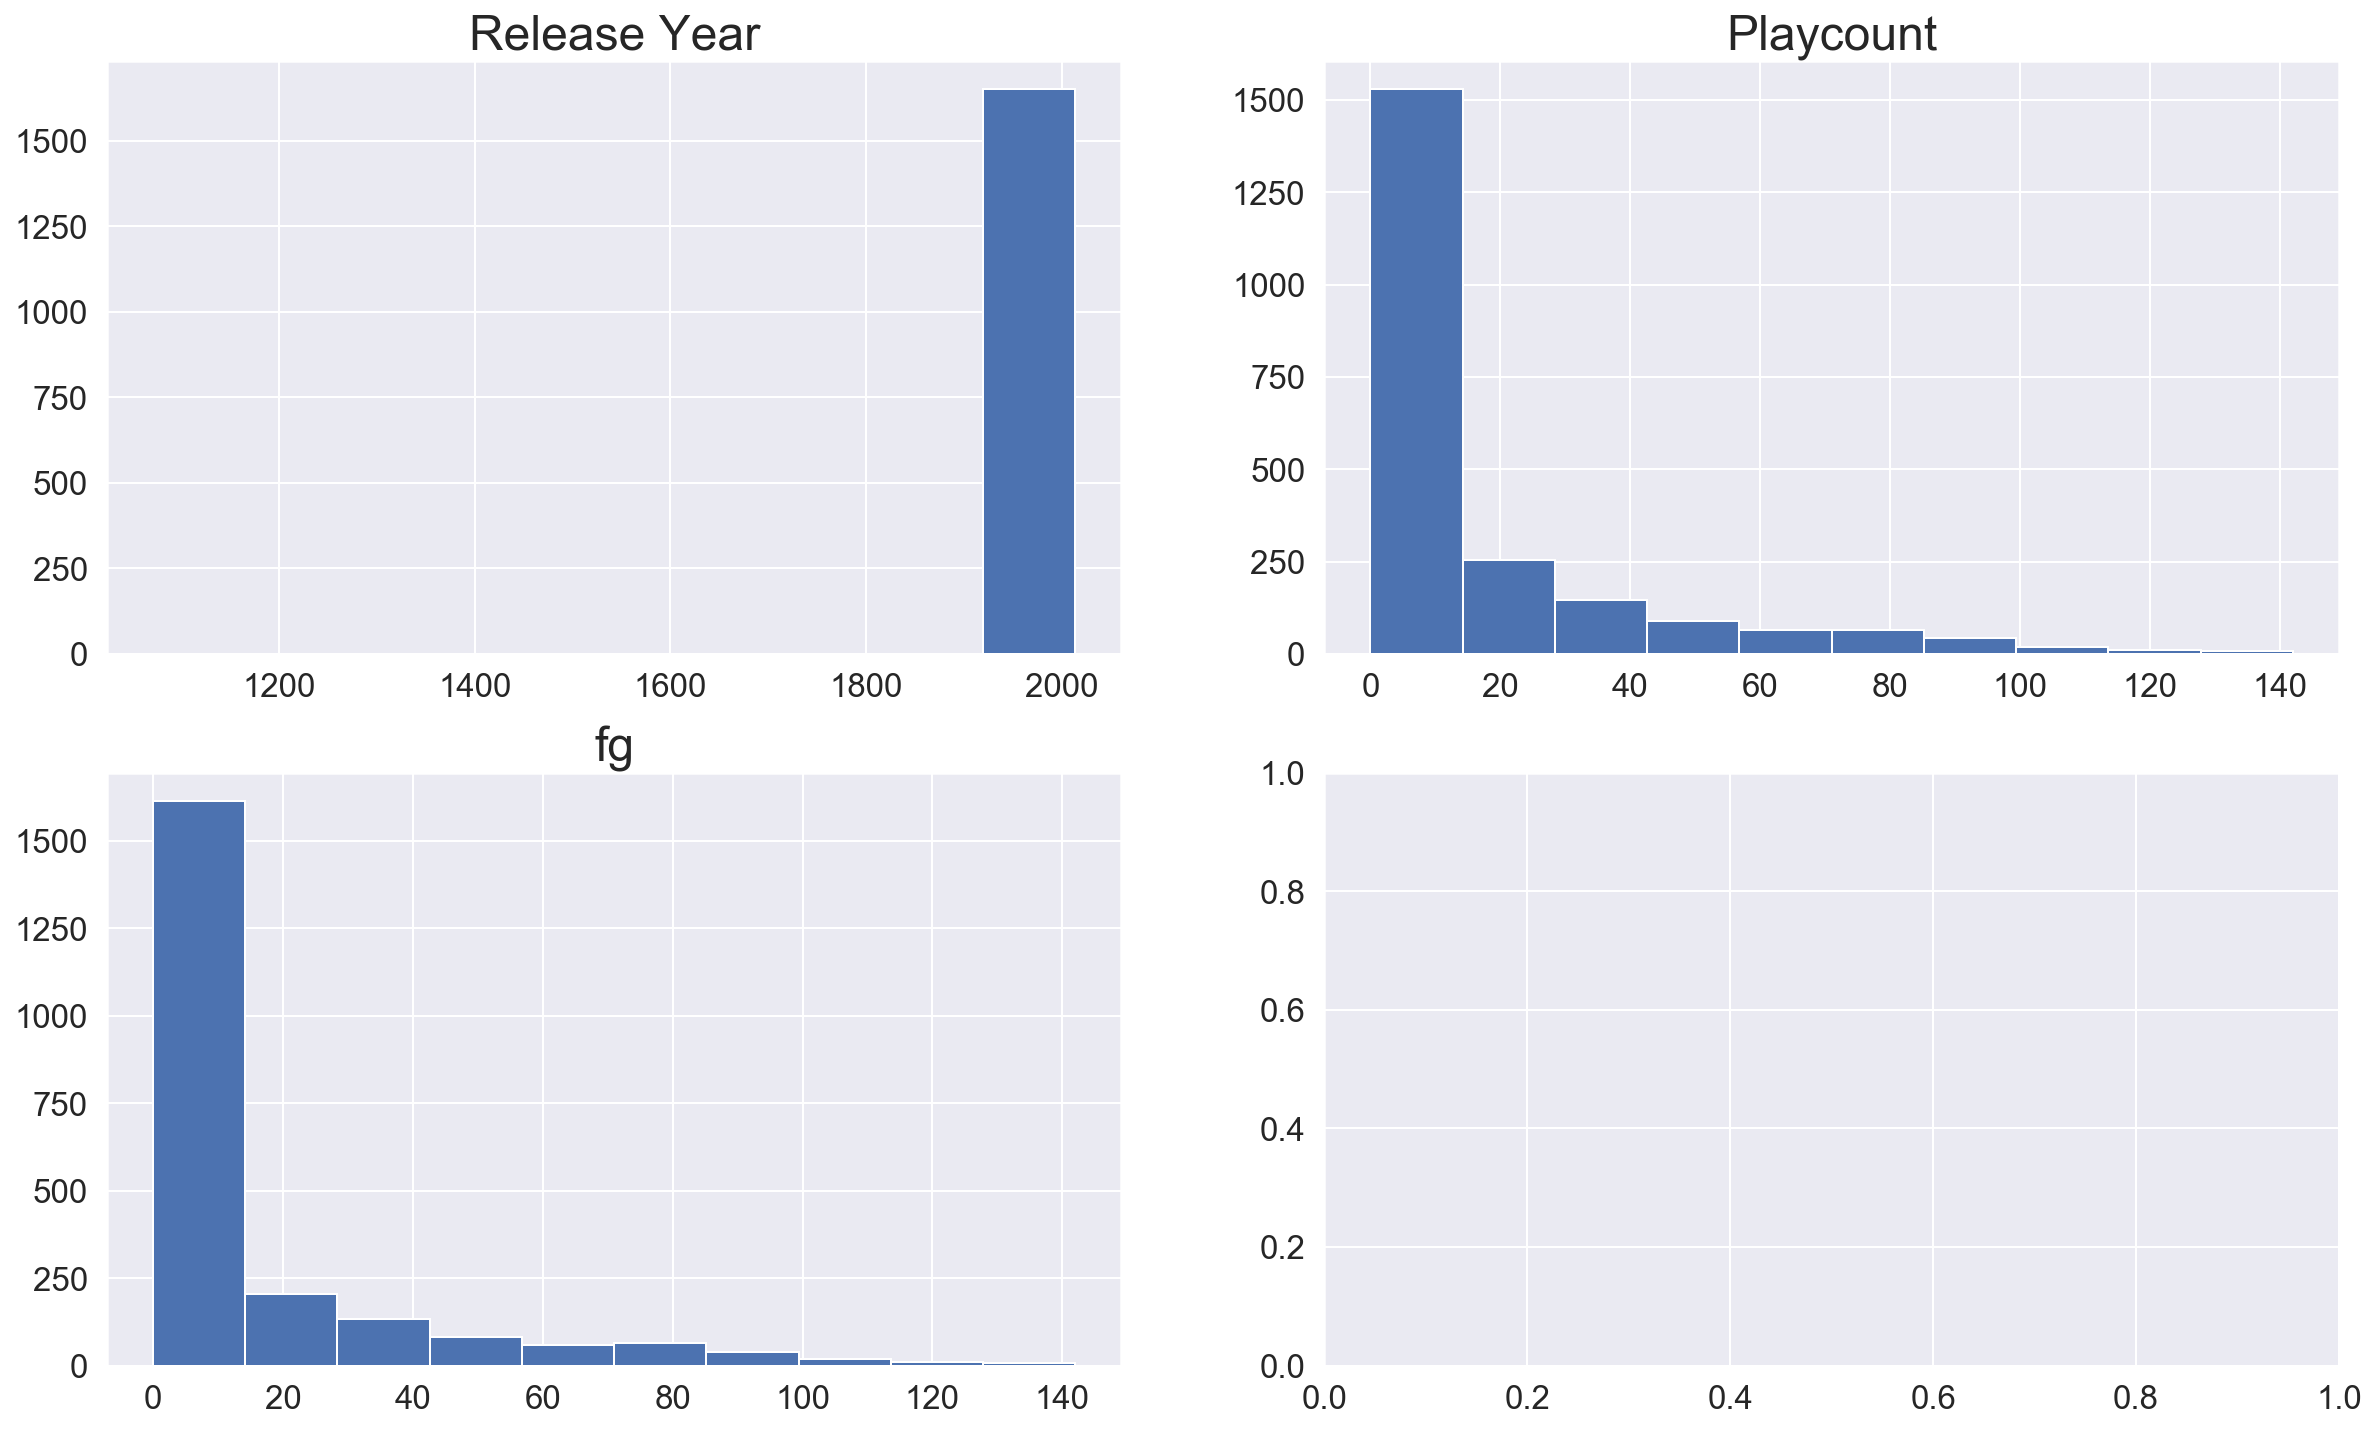

In [66]:
fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(20, 12))

ax[0, 0].hist(df['releaseyear'])
ax[0, 1].hist(df['playcount'])
ax[1, 0].hist(df['fg'])
#ax[1, 1].plot('sales_2016', color='k', lw=3, linestyle='-.')

ax[0, 0].set_title('Release Year', fontsize=24)
ax[0, 1].set_title('Playcount', fontsize=24)
ax[1, 0].set_title('fg', fontsize=24)
#ax[1, 1].set_title('Sales 2016', fontsize=24)
# ax[1, 0].set_ylim([0, 2550000])
# ax[1, 1].set_ylim([0, 2550000])

plt.show()

### 8. Plot the playcount versus the release year.

### 9. Which years have the most releases?

### 10. Which songs don't have matching "Play Count" corresponding to "F*G"?

### 11. Which are the top 10 artists with the most songs?

### Bonus: Which are the top 5 artists with the most playcounts? 

### Bonus: Which artists have the most missing values between each of the variables? 